In [4]:
import numpy as np               
import pandas as pd 
import nltk
import string
import re

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [5]:
#text preprocessing (same as last week's lab)
reviews = pd.read_csv("imdbReviews.csv")

In [6]:
reviews.head()

,Index,URL,Text,Sentiment
0,3617,http://www.imdb.com/title/tt0210075/usercomments,Girlfight follows a project dwelling New York ...,POS
1,3671,http://www.imdb.com/title/tt0337640/usercomments,Hollywood North is an euphemism from the movie...,POS
2,3157,http://www.imdb.com/title/tt0303549/usercomments,That '70s Show is definitely the funniest show...,POS
3,660,http://www.imdb.com/title/tt0716825/usercomments,"9/10- 30 minutes of pure holiday terror. Okay,...",POS
4,265,http://www.imdb.com/title/tt0182225/usercomments,"A series of random, seemingly insignificant th...",POS


In [7]:
reviews.shape

(2000, 4)

In [8]:
reviews['Sentiment'].value_counts()

Sentiment
POS    1000
NEG    1000
Name: count, dtype: int64

In [10]:
#save the labels and encode them as 1 and 0 for future classification/clustering
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
label = enc.fit_transform(reviews['Sentiment'])
print(label[:10])
print(reviews['Sentiment'][:10])

[1 1 1 1 1 1 1 1 1 1]
0    POS
1    POS
2    POS
3    POS
4    POS
5    POS
6    POS
7    POS
8    POS
9    POS
Name: Sentiment, dtype: object


In [11]:
#change the text column datatype to string
reviews = reviews.astype({'Text':'string'})

In [12]:
#get the review text for preprocessing
text = reviews['Text']
#text[:5]

In [13]:
text1 = []

for review in text:
    #print(sentence)
    #remove punctuation
    review = review.translate(str.maketrans('', '', string.punctuation))  
    # remove digits/numbers
    review = review.translate(str.maketrans('', '', string.digits))
    #change to lowercase
    review = review.lower()
    #print(sentence)
    text1.append(review)
    
 
#text1[:5]

In [14]:
text1 = pd.Series(text1)
#text1[:5]

In [15]:
#remove stop words
    
#Setting English stopwords
stop_words = set(stopwords.words('english'))

text1 = text1.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))
#text1[:5]

In [16]:
#apply stemming
ps = nltk.PorterStemmer()

text1 = text1.apply(lambda x: ' '.join(ps.stem(term) for term in x.split()))
text1[:5]

0    girlfight follow project dwell new york high s...
1    hollywood north euphem movi industri went cana...
2    show definit funniest show current tv start wa...
3    minut pure holiday terror okay scari sure funt...
4    seri random seemingli insignific theft sister ...
dtype: object

In [17]:
reviews1 = list(zip(text1, label))

In [18]:
reviews1[:3]

[('girlfight follow project dwell new york high school girl sens futil world amateur box find self esteem purpos much although film box box film much almost smell sweat technic artist good shoot sens honesti realiti girlfight chick flick rocki rather human drama even viewer dont know box abl connect withgirlfight follow project dwell new york high school girl sens futil world amateur box find self esteem purpos much',
  np.int64(1)),
 ('hollywood north euphem movi industri went canada make movi tax break cheaper cost civil citi like toronto case later vancouv peter obrian director probabl saw lot invad california movi seem right way deal arriv person tri capit econom canada presentedneedless say moon lantern success novel written canadian author turn flight bogota noth origin film great egotist hasbeen michael bayt obsess happen iran offer lead part turn disasterth film seem say mani cook spoil broth seem case ultim product save produc bobbi myer help sandi ryan around make documentari

In [19]:
reviewsP = pd.DataFrame (reviews1, columns = ['Review', 'Sentiment'])

In [20]:
reviewsP

,Review,Sentiment
0,girlfight follow project dwell new york high s...,1
1,hollywood north euphem movi industri went cana...,1
2,show definit funniest show current tv start wa...,1
3,minut pure holiday terror okay scari sure funt...,1
4,seri random seemingli insignific theft sister ...,1
...,...,...
1995,tourist head ireland school trip learn druid e...,0
1996,two film use scare peopl god event horizon one...,0
1997,ulis literatur teacher arriv coastal town fell...,0
1998,um okay guess get whole shakycam gorillastyl f...,0


In [21]:
#may be worth shuffeling the data to prevent any ordering having an influence on the performance
reviewsP.head()

,Review,Sentiment
0,girlfight follow project dwell new york high s...,1
1,hollywood north euphem movi industri went cana...,1
2,show definit funniest show current tv start wa...,1
3,minut pure holiday terror okay scari sure funt...,1
4,seri random seemingli insignific theft sister ...,1


In [22]:
reviewsP1 = reviewsP.sample(frac=1, random_state=1).reset_index()
reviewsP1.head()

,index,Review,Sentiment
0,674,superb episod one best season right horror cha...,1
1,1699,metamorphosi work way chill classic movi pack ...,0
2,1282,spoil lame south border adventur movi someth b...,0
3,1315,actual stop dont get wrong love bad monster mo...,0
4,1210,intent director film quit honor histori produc...,0


In [23]:
#split the dataset  

#train dataset by splitting the data
train_reviews = reviewsP1.Review[:1400]
train_sentiments = reviewsP1.Sentiment[:1400]

#test dataset
test_reviews = reviewsP1.Review[1400:]
test_sentiments = reviewsP1.Sentiment[1400:]

print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(1400,) (1400,)
(600,) (600,)


In [24]:
train_reviews[0]

'superb episod one best season right horror chang stori way way averag moh episod thing man wife almost burn death tragic car wreck drive airbag work didnt burn beyond recognit great makeup btw given much chanc live without full skin graft even coma keep die brought back modern technolog die minut ghost appear veng spirit carnag cours ensu also extrem gori kill also extrem sexi scene could ask might ask well much babi satir end leav smile viewer face love rob schmidt wrong turn direct great knack horror excel episod one im buy surethi superb episod one best season'

In [25]:
#Count vectorizer for bag of words
#cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
cv=CountVectorizer()

#transformed train reviews
cv_train_reviews=cv.fit_transform(train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

#vocab=cv.get_feature_names_out() #toget feature names

BOW_cv_train: (1400, 20316)
BOW_cv_test: (600, 20316)


In [26]:
print(cv_train_reviews[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 82 stored elements and shape (1, 20316)>
  Coords	Values
  (0, 17340)	2
  (0, 5639)	4
  (0, 12620)	3
  (0, 1643)	2
  (0, 15632)	2
  (0, 14943)	1
  (0, 8439)	2
  (0, 2825)	1
  (0, 17041)	1
  (0, 19526)	2
  (0, 1141)	1
  (0, 11506)	1
  (0, 17906)	1
  (0, 10757)	1
  (0, 19803)	1
  (0, 490)	1
  (0, 2362)	2
  (0, 4252)	1
  (0, 18338)	1
  (0, 2571)	1
  (0, 20046)	1
  (0, 5045)	1
  (0, 345)	1
  (0, 19969)	1
  (0, 4565)	1
  :	:
  (0, 9708)	1
  (0, 15870)	1
  (0, 15453)	1
  (0, 3754)	1
  (0, 980)	2
  (0, 11283)	1
  (0, 19613)	1
  (0, 1202)	1
  (0, 15375)	1
  (0, 5495)	1
  (0, 10090)	1
  (0, 16399)	1
  (0, 19231)	1
  (0, 6007)	1
  (0, 10484)	1
  (0, 15011)	1
  (0, 15500)	1
  (0, 20072)	1
  (0, 18539)	1
  (0, 4645)	1
  (0, 9774)	1
  (0, 5842)	1
  (0, 8690)	1
  (0, 2418)	1
  (0, 17377)	1


In [27]:
#Tfidf vectorizer
#tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
tv=TfidfVectorizer()

#transformed train reviews
tv_train_reviews=tv.fit_transform(train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (1400, 20316)
Tfidf_test: (600, 20316)


In [28]:
print(tv_train_reviews[0])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 82 stored elements and shape (1, 20316)>
  Coords	Values
  (0, 17340)	0.19231074277726418
  (0, 5639)	0.3358679880661918
  (0, 12620)	0.09836422741163342
  (0, 1643)	0.10724424468415314
  (0, 15632)	0.19118037603717433
  (0, 14943)	0.06487630311709171
  (0, 8439)	0.1412871048294714
  (0, 2825)	0.07795353335149552
  (0, 17041)	0.04410077779009157
  (0, 19526)	0.09674668625661187
  (0, 1141)	0.10451926613384514
  (0, 11506)	0.1557776783989087
  (0, 17906)	0.05057813061047487
  (0, 10757)	0.05967824276469095
  (0, 19803)	0.08074190550947159
  (0, 490)	0.0678475332121608
  (0, 2362)	0.20417929830007167
  (0, 4252)	0.07657783017613948
  (0, 18338)	0.10828017744363219
  (0, 2571)	0.08631742809670857
  (0, 20046)	0.12718133338567503
  (0, 5045)	0.09504007801608842
  (0, 345)	0.1557776783989087
  (0, 19969)	0.05283552122131986
  (0, 4565)	0.06119941596653293
  :	:
  (0, 9708)	0.06998864335920771
  (0, 15870)	0.10208964915003584
  (0

In [29]:
print(train_sentiments)
print(test_sentiments)

0       1
1       0
2       0
3       0
4       0
       ..
1395    0
1396    1
1397    0
1398    0
1399    0
Name: Sentiment, Length: 1400, dtype: int64
1400    1
1401    1
1402    1
1403    0
1404    0
       ..
1995    0
1996    0
1997    0
1998    1
1999    0
Name: Sentiment, Length: 600, dtype: int64


DT_bow accuracy : 0.8416666666666667
DT_tfidf accuracy : 0.89
[[254  52]
 [ 43 251]] 

              precision    recall  f1-score   support

    Positive       0.86      0.83      0.84       306
    Negative       0.83      0.85      0.84       294

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.84      0.84       600

[[263  43]
 [ 23 271]] 

              precision    recall  f1-score   support

    Positive       0.92      0.86      0.89       306
    Negative       0.86      0.92      0.89       294

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600

roc_auc_score for DT:  0.8906229158329999


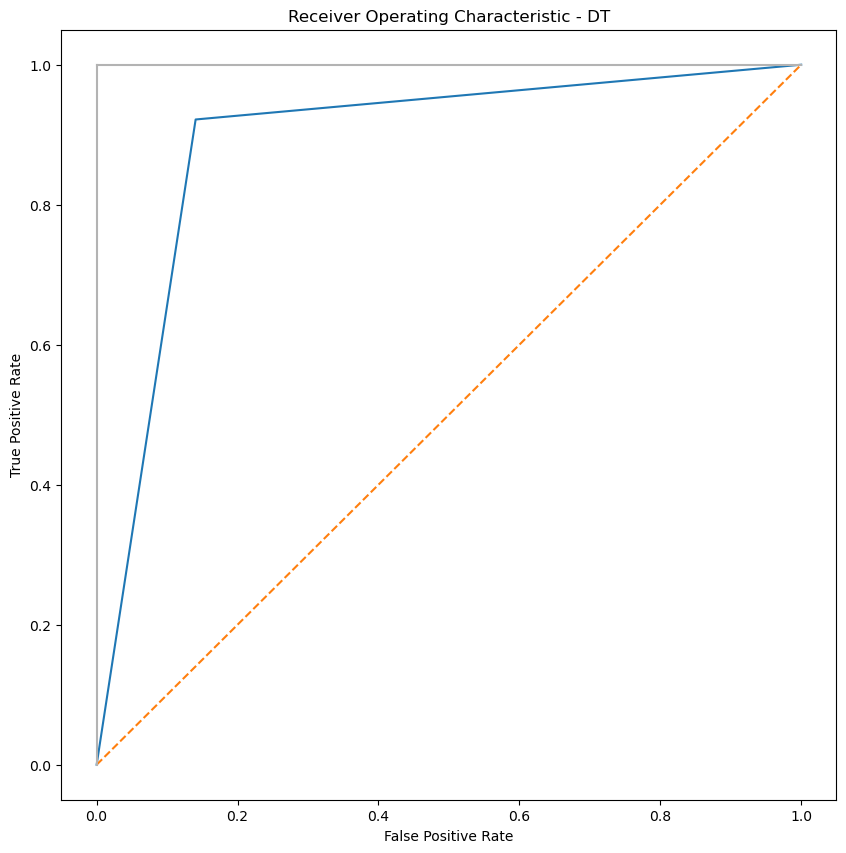

In [30]:
############################################
###           Decision Tree              ###
############################################
#training the model
DT=DecisionTreeClassifier(criterion ='entropy', random_state= 0)

#Fitting the model for Bag of words
DT_bow=DT.fit(cv_train_reviews,train_sentiments)

#Fitting the model for tfidf features
DT_tfidf=DT.fit(tv_train_reviews,train_sentiments)

#Predicting the model for bag of words
DT_bow_predict=DT.predict(cv_test_reviews)

##Predicting the model for tfidf features
DT_tfidf_predict=DT.predict(tv_test_reviews)

#Accuracy score for bag of words
DT_bow_score=accuracy_score(test_sentiments,DT_bow_predict)
print("DT_bow accuracy :",DT_bow_score)

#Accuracy score for tfidf features
DT_tfidf_score=accuracy_score(test_sentiments,DT_tfidf_predict)
print("DT_tfidf accuracy :",DT_tfidf_score)

#Classification report for bag of words 
DT_bow_report=classification_report(test_sentiments,DT_bow_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,DT_bow_predict), '\n')
print(DT_bow_report)

#Classification report for tfidf features
DT_tfidf_report=classification_report(test_sentiments,DT_tfidf_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,DT_tfidf_predict), '\n')
print(DT_tfidf_report)

#AUC score and ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

FP, TP, threshold1 = roc_curve(test_sentiments, DT_tfidf_predict)
print('roc_auc_score for DT: ', roc_auc_score(test_sentiments, DT_tfidf_predict))

import matplotlib.pyplot as plt

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DT')
plt.plot(FP, TP)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [31]:
############################################
###             Naive Bayes              ###
############################################

NB = MultinomialNB()

#Fitting the model for Bag of words
NB_bow = NB.fit(cv_train_reviews,train_sentiments)

#Fitting the model for tfidf features
NB_tfidf = NB.fit(tv_train_reviews,train_sentiments)

#Predicting the model for bag of words
NB_bow_predict = NB.predict(cv_test_reviews)

#Predicting the model for tfidf features
NB_tfidf_predict = NB.predict(tv_test_reviews)

#Accuracy score for bag of words
NB_bow_score=accuracy_score(test_sentiments,NB_bow_predict)
print("NB_bow accuracy :",NB_bow_score)

#Accuracy score for tfidf features
NB_tfidf_score=accuracy_score(test_sentiments,NB_tfidf_predict)
print("NB_tfidf accuracy :",NB_tfidf_score)

#Classification report for bag of words 
NB_bow_report=classification_report(test_sentiments,NB_bow_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,NB_bow_predict), '\n')
print(NB_bow_report)

#Classification report for tfidf features
NB_tfidf_report=classification_report(test_sentiments,NB_tfidf_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,NB_tfidf_predict), '\n')
print(NB_tfidf_report)

NB_bow accuracy : 0.8616666666666667
NB_tfidf accuracy : 0.8516666666666667
[[281  25]
 [ 58 236]] 

              precision    recall  f1-score   support

    Positive       0.83      0.92      0.87       306
    Negative       0.90      0.80      0.85       294

    accuracy                           0.86       600
   macro avg       0.87      0.86      0.86       600
weighted avg       0.87      0.86      0.86       600

[[263  43]
 [ 46 248]] 

              precision    recall  f1-score   support

    Positive       0.85      0.86      0.86       306
    Negative       0.85      0.84      0.85       294

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600



In [34]:
############################################
###                  SVM                 ###
############################################
#linear SVM
SVM = SGDClassifier(loss='hinge',max_iter=500,random_state=42)

#Fitting the model for Bag of words
SVM_bow = SVM.fit(cv_train_reviews,train_sentiments)

#Fitting the model for tfidf features
SVM_tfidf = SVM.fit(tv_train_reviews,train_sentiments)

#Predicting the model for bag of words
SVM_bow_predict = SVM.predict(cv_test_reviews)

#Predicting the model for tfidf features
SVM_tfidf_predict = SVM.predict(tv_test_reviews)

#Accuracy score for bag of words
SVM_bow_score=accuracy_score(test_sentiments,SVM_bow_predict)
print("SVM_bow accuracy :",SVM_bow_score)

#Accuracy score for tfidf features
SVM_tfidf_score=accuracy_score(test_sentiments,SVM_tfidf_predict)
print("SVM_tfidf accuracy :",SVM_tfidf_score)

#Classification report for bag of words 
SVM_bow_report=classification_report(test_sentiments,SVM_bow_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,SVM_bow_predict), '\n')
print(SVM_bow_report)

#Classification report for tfidf features
SVM_tfidf_report=classification_report(test_sentiments,SVM_tfidf_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,SVM_tfidf_predict), '\n')
print(SVM_tfidf_report)

SVM_bow accuracy : 0.8766666666666667
SVM_tfidf accuracy : 0.8633333333333333
[[276  30]
 [ 44 250]] 

              precision    recall  f1-score   support

    Positive       0.86      0.90      0.88       306
    Negative       0.89      0.85      0.87       294

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600

[[253  53]
 [ 29 265]] 

              precision    recall  f1-score   support

    Positive       0.90      0.83      0.86       306
    Negative       0.83      0.90      0.87       294

    accuracy                           0.86       600
   macro avg       0.87      0.86      0.86       600
weighted avg       0.87      0.86      0.86       600



In [ ]:
############################################
###                  k-NN                ###
############################################

kNN = KNeighborsClassifier(n_neighbors=7) # we can do trail and error to find the best k value, eg: 1 to 20. 

#Fitting the model for Bag of words
kNN_bow = kNN.fit(cv_train_reviews,train_sentiments)

#Fitting the model for tfidf features
kNN_tfidf = kNN.fit(tv_train_reviews,train_sentiments)

#Predicting the model for bag of words
kNN_bow_predict = kNN.predict(cv_test_reviews)

#Predicting the model for tfidf features
kNN_tfidf_predict = kNN.predict(tv_test_reviews)

#Accuracy score for bag of words
kNN_bow_score=accuracy_score(test_sentiments,kNN_bow_predict)
print("kNN_bow accuracy :",kNN_bow_score)

#Accuracy score for tfidf features
kNN_tfidf_score=accuracy_score(test_sentiments,kNN_tfidf_predict)
print("kNN_tfidf accuracy :",kNN_tfidf_score)

#Classification report for bag of words 
kNN_bow_report=classification_report(test_sentiments,kNN_bow_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,kNN_bow_predict), '\n')
print(kNN_bow_report)

#Classification report for tfidf features
kNN_tfidf_report=classification_report(test_sentiments,kNN_tfidf_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,kNN_tfidf_predict), '\n')
print(kNN_tfidf_report)

kNN_bow accuracy : 0.7233333333333334
kNN_tfidf accuracy : 0.75
[[260  46]
 [120 174]] 

              precision    recall  f1-score   support

    Positive       0.68      0.85      0.76       306
    Negative       0.79      0.59      0.68       294

    accuracy                           0.72       600
   macro avg       0.74      0.72      0.72       600
weighted avg       0.74      0.72      0.72       600

[[258  48]
 [102 192]] 

              precision    recall  f1-score   support

    Positive       0.72      0.84      0.77       306
    Negative       0.80      0.65      0.72       294

    accuracy                           0.75       600
   macro avg       0.76      0.75      0.75       600
weighted avg       0.76      0.75      0.75       600

